In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
# Load dataset
df = pd.read_csv("Advertising.csv")

In [3]:

# Display correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                  TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


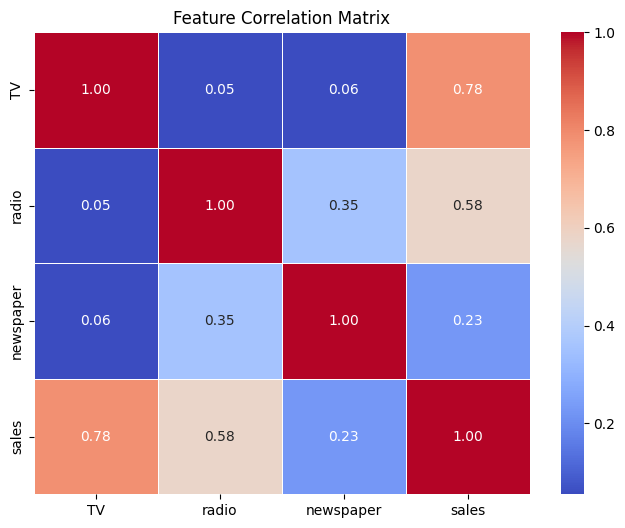

In [4]:

# Save correlation matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.savefig("correlation_matrix.png")  # Save for Streamlit display


In [5]:

# Train model WITHOUT newspaper
X = df[['TV', 'radio']]  # Only using TV and radio
y = df['sales']


In [6]:

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:

# Predictions
y_pred = model.predict(X_test)


In [9]:

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Performance (Without Newspaper):\nMAE: {mae}, MSE: {mse}")


Model Performance (Without Newspaper):
MAE: 1.4443023138227578, MSE: 3.137948009068354


In [10]:

# Save the trained model
with open("trained_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as 'trained_model.pkl'")

Model saved as 'trained_model.pkl'
